In [11]:
DATASET_PATH = "Dataset/breast-cancer-linear.csv"
START_WEIGHTS = [
    0.1,
    0.2,
    0.3,
    0.4,
    0.3,
    0.2,
    0.1,
    0.3,
    0.4
]
BIAS = 1 
LEARNING_RATE = 1
MAX_EPOCHS = 200 

In [2]:
from Perceptron import Perceptron
from utils import get_data,test_acurracy

data = get_data(DATASET_PATH)
test_data = data[-10:]
train_data = data[:-10]

perceptron = Perceptron(data=train_data,
               weights=START_WEIGHTS,
               bias=BIAS,
               learning_rate=LEARNING_RATE,
               max_epochs=MAX_EPOCHS)

converged, epoch, wheights = perceptron.train()

if converged:
    accuracy = test_acurracy(perceptron,test_data)
    print(f"Convergeu em {epoch} épocas. A taxa de acerto do Perceptron é: {accuracy:.2f} ({(accuracy * 100):.2f}%)")
else:
    print(f"Não foi possível convergir após {epoch} épocas")

Convergeu em 136 épocas. A taxa de acerto do Perceptron é: 1.00 (100.00%)



--- Testando LEARNING_RATE: 0.001 ---
Convergiu em 112 épocas. Acurácia: 1.0000

--- Testando LEARNING_RATE: 0.01 ---
Convergiu em 133 épocas. Acurácia: 1.0000

--- Testando LEARNING_RATE: 0.1 ---
Convergiu em 139 épocas. Acurácia: 1.0000

--- Testando LEARNING_RATE: 0.5 ---
Convergiu em 97 épocas. Acurácia: 1.0000

--- Testando LEARNING_RATE: 1.0 ---
Convergiu em 161 épocas. Acurácia: 1.0000

--- Testando LEARNING_RATE: 2.0 ---
Convergiu em 185 épocas. Acurácia: 1.0000


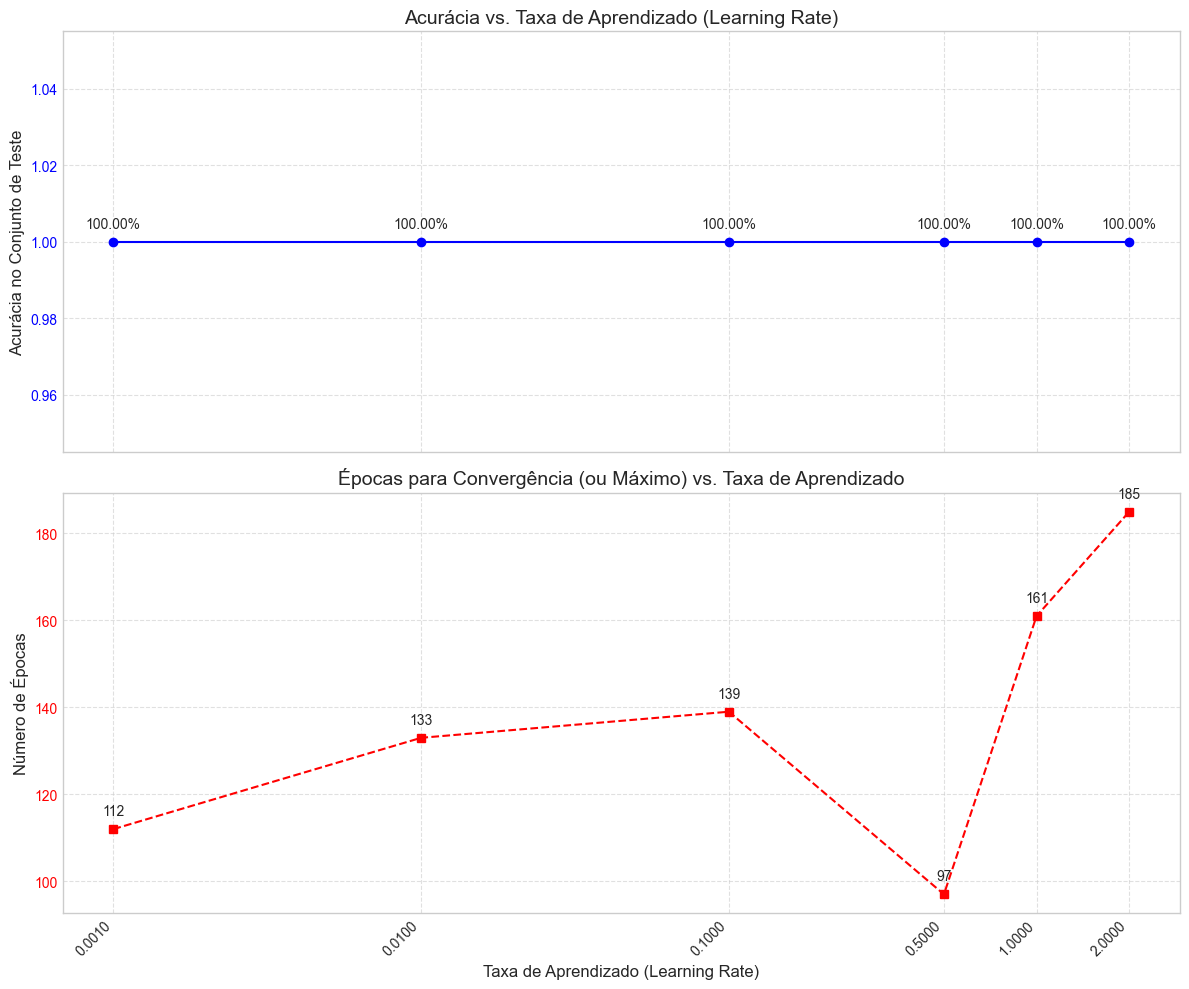

In [12]:
import matplotlib.pyplot as plt
import numpy as np # Importar para usar o logspace
from Perceptron import Perceptron
from utils import get_data, test_acurracy

data = get_data(DATASET_PATH)
test_data = data[-10:]
train_data = data[:-10]

learning_rates_to_test = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0]
results_accuracy = {} 
results_epochs = {}

for lr in learning_rates_to_test:
    lr_display = round(lr, 4)
    print(f"\n--- Testando LEARNING_RATE: {lr_display} ---")
    
    perceptron = Perceptron(data=train_data,
                            weights=START_WEIGHTS,
                            bias=BIAS,
                            learning_rate=lr,
                            max_epochs=MAX_EPOCHS)
    
    converged, epoch, weights = perceptron.train()
    
    results_epochs[lr] = epoch 
    
    if converged:
        accuracy = test_acurracy(perceptron, test_data)
        results_accuracy[lr] = accuracy
        print(f"Convergiu em {epoch} épocas. Acurácia: {accuracy:.4f}")
    else:
        accuracy = test_acurracy(perceptron, test_data)
        results_accuracy[lr] = accuracy
        print(f"NÃO Convergiu após {epoch} épocas. Acurácia: {accuracy:.4f}")



lrs = list(results_accuracy.keys())
accuracies = list(results_accuracy.values())
epochs = list(results_epochs.values())

plt.style.use('seaborn-v0_8-whitegrid')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

ax1.plot(lrs, accuracies, marker='o', linestyle='-', color='blue')
ax1.set_title('Acurácia vs. Taxa de Aprendizado (Learning Rate)', fontsize=14)
ax1.set_ylabel('Acurácia no Conjunto de Teste', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.6)

for lr, acc in zip(lrs, accuracies):
    ax1.annotate(f'{acc*100:.2f}%', (lr, acc), textcoords="offset points", xytext=(0, 10), ha='center')


ax2.plot(lrs, epochs, marker='s', linestyle='--', color='red')
ax2.set_title('Épocas para Convergência (ou Máximo) vs. Taxa de Aprendizado', fontsize=14)
ax2.set_xlabel('Taxa de Aprendizado (Learning Rate)', fontsize=12)
ax2.set_ylabel('Número de Épocas', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(True, linestyle='--', alpha=0.6)

for lr, ep in zip(lrs, epochs):
    ax2.annotate(str(ep), (lr, ep), textcoords="offset points", xytext=(0, 10), ha='center')


plt.xscale('log') 
plt.xticks(lrs, [f'{l:.4f}' for l in lrs], rotation=45, ha='right')

plt.tight_layout()
plt.show()